# NVCL_KIT Tray Image Demonstration

*Acknowledgement: Borehole dataset courtesy of Mineral Resources Tasmania. (https://www.mrt.tas.gov.au/home)*

In [1]:
import io
from PIL import Image
import matplotlib.pyplot as plt
from nvcl_kit.reader import NVCLReader
from nvcl_kit.param_builder import param_builder
from nvcl_kit.constants import Scalar
from nvcl_kit.generators import gen_tray_thumb_imgs

**Build parameters**

In [2]:
param = param_builder('tas', max_boreholes=23)
if not param:
    print(f"Cannot build parameters for 'tas'")

**Initialise reader object**

In [3]:
reader = NVCLReader(param)
if not reader.wfs:
        print("ERROR!")

**Get list of WFS borehole information, print number of boreholes in list**

In [4]:
feat_list = reader.get_feature_list()
print(len(feat_list))

23


**Print WFS information from the borehole called 'BRD005'**

In [5]:
feat_list = reader.filter_feat_list(name='BRD005')
print(feat_list)

[namespace(boreholeLength_m='1181.0', boreholeMaterialCustodian='MRT', description='', drillEndDate='', drillStartDate='1989-12-03', driller='Private Contractor', drillingMethod='Diamond', elevation_m='653.06', elevation_srs='http://www.opengis.net/def/crs/EPSG/0/5711', genericSymbolizer='', href='http://www.mrt.tas.gov.au/resource/feature/mrt/borehole/13358', inclinationType='vertical', metadata_uri='http://researchdata.ands.org.au/geosciml-drillhole-locations-in-tasmania-d354a70a4a29536166ab8a9ca6470a79d628c05e', name='BRD005', nvcl_id='13358', operator='Placer Exploration Ltd', parentBorehole_uri='', positionalAccuracy='', purpose='Metallic minerals', source='https://www.mrt.tas.gov.au/webdoc2/app/default/drilling_detail?id=13358', startPoint='unknown', status='unknown', x=145.66751239, y=-41.59387927, z=653.06)]


In [6]:
for feat in feat_list:
    print(f"My name is {feat.name}, my operator is {feat.operator}")

My name is BRD005, my operator is Placer Exploration Ltd


**Print depth list and image of first tray image to be found**

*** My NVCL id is 10026 ***
[namespace(end_value='6.405648', sample_no='0', start_value='0.004784'), namespace(end_value='10.596881', sample_no='1', start_value='6.42312'), namespace(end_value='15.186239', sample_no='2', start_value='10.603441'), namespace(end_value='18.98863', sample_no='3', start_value='15.202843'), namespace(end_value='23.98504', sample_no='4', start_value='19.00374'), namespace(end_value='28.566298', sample_no='5', start_value='24.003426'), namespace(end_value='32.887077', sample_no='6', start_value='28.583231'), namespace(end_value='37.646458', sample_no='7', start_value='32.903545'), namespace(end_value='42.296528', sample_no='8', start_value='37.653473'), namespace(end_value='46.59679', sample_no='9', start_value='42.303207'), namespace(end_value='51.196568', sample_no='10', start_value='46.60343'), namespace(end_value='55.746605', sample_no='11', start_value='51.203396'), namespace(end_value='59.996826', sample_no='12', start_value='55.753174'), namespace(end_v

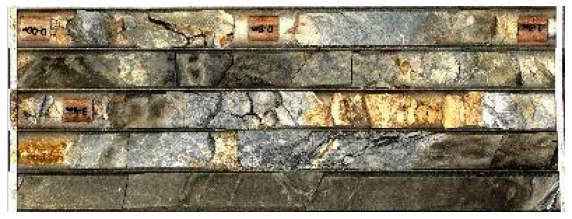

In [7]:
for n_id, dsid, ilog, depth_list, jpg in gen_tray_thumb_imgs(reader):
    # Display first image, then exit loop
    print(f"*** My NVCL id is {n_id} ***")
    print(depth_list)

    image = Image.open(io.BytesIO(jpg))
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.imshow(image)
    ax.axis('off')
    break

**Get dataset ids from 'ML041'**

In [ ]:
datasetid_list = reader.get_datasetid_list(nvcl_id_list[6])

In [ ]:
print(datasetid_list)


**Display tray image**

In [ ]:
ilog_list = reader.get_tray_thumb_imglogs(datasetid_list[0])

# Loop over tray images
for ilog in ilog_list:
    
    # Display first image, then exit loop
    image_data = reader.get_tray_thumb_jpg(ilog.log_id)
    image = Image.open(io.BytesIO(image_data))
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.axis('off')
    break